CASES
Total cases: 532,373
Cases as a percent of the population: 7.723386043812564 %

Positive cases: 92675
Positive cases as a percent of the population: 1.3444799071521834 %

Total Hospitalized: 9308
Hospitalized as a percent of total cases: 1.7483982095260278 %
Hopsitalized as a percent of positive cases: 10.043701106015646 %



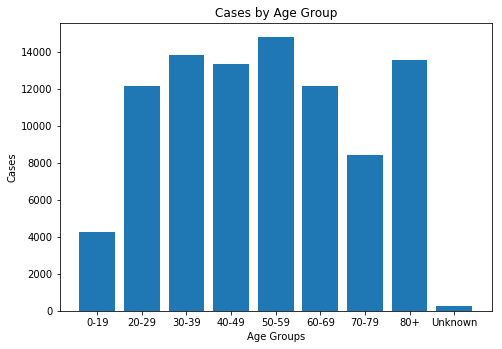

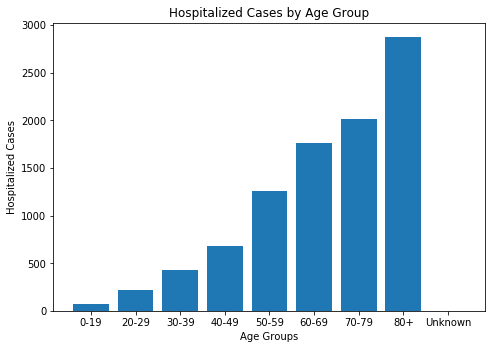

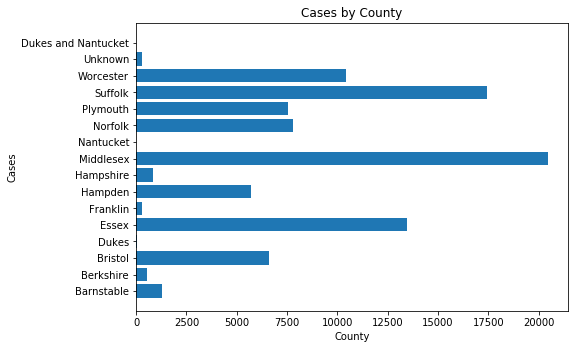

DEATHS
Total Deaths: 6372 

Deaths as a percent of total cases: 1.196905177385029 %
Deaths as a percent of positive cases: 6.875640679794983 %
Deaths as a percent of the population: 0.09244160742782533 %


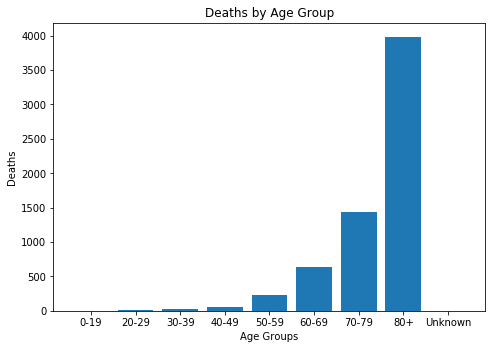

In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df_age = pd.read_csv('source/Mass Covid Data/AgebyDate.csv', encoding='latin-1', usecols = None)
df_age = df_age.set_index('Date')

df_cases = pd.read_csv('source/Mass Covid Data/CasesbyDate.csv', encoding='latin-1', usecols = None)
df_cases = df_cases.set_index('Date')

df_county = pd.read_csv('source/Mass Covid Data/DeathsbyCountybyDate.csv', encoding='latin-1', usecols = None)
df_county = df_county.set_index('Date')

df_tests = pd.read_csv('source/Mass Covid Data/TestingbyDate.csv', encoding='latin-1', usecols = None)
df_tests = df_tests.set_index('Date')

MA_pop = int(6893000)

#-------------------------------------------Objective/Groupings-------------------------------------------#
#Group if you have duplicate dates or ids that you need to combine the data for.

#Objectives:
    #A.Testing to flatten curve.

    #B. CASES:
        #a  total cases / total cases per population (done)
        #b. positive cases per population (done)
        #c. age group (done)
        #d. positive cases per age group (done)
        #e. cases/positive cases per location/county.
        #f. Hopitalized cases (done)

    #C. DEATHS:
        #a. cases
        #b. population
        #c. age group
        #d. location/county
#-------------------------------------------Stats/Analysis--------------------------------------------#
#--------TESTING TO FLATTEN CURVE---------#
total_tests = int(df_tests['Total'][-1:]) # Amount: 532,373
total_positiveTests = int(df_tests['Positive'][-1]) #total cases.
df_tests.describe() #statistical analysis

#---------------------CASES---------------------#
#1 Total Cases and cases as a percent of population
total_cases = int(df_tests['New'].sum()) #Total cases
case_per_population = (total_cases / MA_pop *100) #cases per population (%)
print("CASES\nTotal cases:",format(total_cases,","))
print("Cases as a percent of the population:",case_per_population,"%\n")

#2 Positive cases, positive cases per population, hospitalization and hospitalization per population
total_positive_cases = int(df_cases.sum()) #Total cases
positive_case_per_population = (total_positive_cases / MA_pop *100) #cases per population (%)
print("Positive cases:",total_positive_cases)
print("Positive cases as a percent of the population:",positive_case_per_population,"%\n")

total_hospitalized = int(df_age.loc['5/24/2020']['Hospitalized'].sum())
hospitalized_per_case = (total_hospitalized / total_cases * 100)
hospitalized_per_positive_case = (total_hospitalized / total_positive_cases *100)
print("Total Hospitalized:",total_hospitalized)
print("Hospitalized as a percent of total cases:",hospitalized_per_case,"%")
print("Hopsitalized as a percent of positive cases:",hospitalized_per_positive_case,"%\n")

#3 Cases by age group, positive cases by age group and cases by location
recent_cases = df_age.loc["5/24/2020"] #use to chart cases by age group
case_by_county = df_county.loc["5/24/2020"] #use to chart cases by county

#-------------------CASES CHARTED----------------#
#Cases by Age group
fig=plt.figure()
age_chart = fig.add_axes([0,0,1,1])
age_chart.bar(recent_cases["Age"],recent_cases["Cases"])
age_chart.set_title("Cases by Age Group")
age_chart.set_xlabel("Age Groups")
age_chart.set_ylabel("Cases")
plt.show()

#Hospitalizations by Age Group
fig2=plt.figure()
hospitalized_chart = fig2.add_axes([0,0,1,1])
hospitalized_chart.bar(recent_cases["Age"],recent_cases["Hospitalized"])
hospitalized_chart.set_title("Hospitalized Cases by Age Group")
hospitalized_chart.set_xlabel("Age Groups")
hospitalized_chart.set_ylabel("Hospitalized Cases")
plt.show()

#Cases by County
fig3=plt.figure()
county_chart = fig3.add_axes([0,0,1,1])
county_chart.barh(case_by_county["County"],case_by_county["Count"])
county_chart.set_title("Cases by County")
county_chart.set_xlabel("County")
county_chart.set_ylabel("Cases")
plt.show()
#would be interesting to see the # of nursing homes in the high case counties.


#-------------------DEATHS----------------#
total_deaths = int(df_age.loc['5/24/2020']['Deaths'].sum())
print("DEATHS")
print("Total Deaths:",total_deaths,'\n')
deaths_per_case = (total_deaths / total_cases * 100)
deaths_per_positive_case = (total_deaths / total_positive_cases *100)
deaths_per_population = (total_deaths / MA_pop *100)
print("Deaths as a percent of total cases:",deaths_per_case,'%')
print("Deaths as a percent of positive cases:",deaths_per_positive_case,'%')
print("Deaths as a percent of the population:",deaths_per_population,"%")

#-------------------DEATHS----------------#
#Deaths by Age Group
fig4=plt.figure()
deaths_chart = fig4.add_axes([0,0,1,1])
deaths_chart.bar(df_age["Age"],df_age["Deaths"])
deaths_chart.set_title("Deaths by Age Group")
deaths_chart.set_xlabel("Age Groups")
deaths_chart.set_ylabel("Deaths")
plt.show()

#Deaths by County
deaths_by_county = df_county.loc['5/24/2020'].sort_values(by=['Deaths'])

#Death percentage by age group

#-------------------------------------------Export----------------------#


In [434]:
#Death by age group ratios
death_0to19 = (df_age.iloc[-9]['Deaths']/total_deaths)
print("Deaths as a percentage of total deaths for age group 0 to 19:",death_0to19,"%")

death_20to29 = (df_age.iloc[-8]['Deaths']/total_deaths)
print("Deaths as a percentage of total deaths for age group 20 to 29:",death_20to29,"%")

death_30to39 = (df_age.iloc[-7]['Deaths']/total_deaths)
print("Deaths as a percentage of total deaths for age group 30 to 39:",death_30to39,"%")

death_40to49 = (df_age.iloc[-6]['Deaths']/total_deaths)
print("Deaths as a percentage of total deaths for age group 40 to 49:",death_40to49,"%")

death_50to59 = (df_age.iloc[-5]['Deaths']/total_deaths)
print("Deaths as a percentage of total deaths for age group 50 to 59:",death_50to59,"%")

death_60to69 = (df_age.iloc[-4]['Deaths']/total_deaths)
print("Deaths as a percentage of total deaths for age group 60 to 69:",death_60to69,"%")

death_70to79 = (df_age.iloc[-3]['Deaths']/total_deaths)
print("Deaths as a percentage of total deaths for age group 70 to 79:",death_70to79,"%")

death_80plus = (df_age.iloc[-2]['Deaths']/total_deaths)
print("Deaths as a percentage of total deaths for age group 80+:",death_80plus,"%")

Deaths as a percentage of total deaths for age group 0 to 19: 0.0 %
Deaths as a percentage of total deaths for age group 20 to 29: 0.0012554927809165098 %
Deaths as a percentage of total deaths for age group 30 to 39: 0.0029817953546767105 %
Deaths as a percentage of total deaths for age group 40 to 49: 0.008945386064030132 %
Deaths as a percentage of total deaths for age group 50 to 59: 0.03609541745134966 %
Deaths as a percentage of total deaths for age group 60 to 69: 0.1007532956685499 %
Deaths as a percentage of total deaths for age group 70 to 79: 0.22441933458882612 %
Deaths as a percentage of total deaths for age group 80+: 0.625549278091651 %
